<a href="https://colab.research.google.com/github/Hairychest/sparks-manaidu-codes/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name : Masavarapu AppalaNaidu

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# importing dataset
dataset = pd.read_csv('/content/Iris.csv')
print(dataset.head())
print('number of training data',len(dataset))
print('number of features',dataset.shape[1]-2)
print('number of species',len(dataset['Species'].unique()))
print('number of species',dataset['Species'].unique())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
number of training data 150
number of features 4
number of species 3
number of species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#using PCA to convert 4 features into 2 features
#instantiate PCA
pca = PCA(n_components=2)
pca_dataset =pca.fit_transform(dataset.iloc[:,:-1])

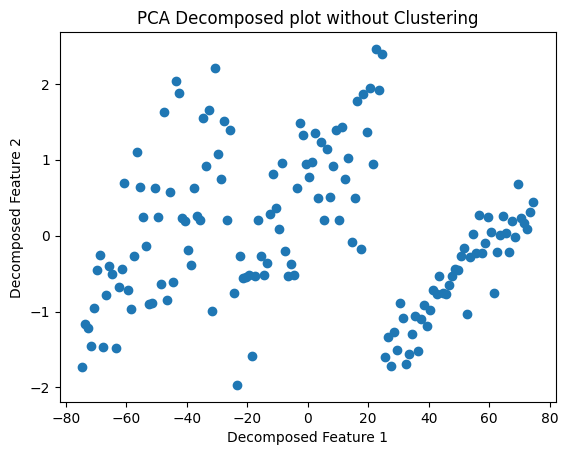

In [ ]:
#visualizing decomposed features
plt.title('PCA Decomposed plot without Clustering')
plt.scatter(pca_dataset[:,0],pca_dataset[:,1])
plt.xlabel('Decomposed Feature 1')
plt.ylabel('Decomposed Feature 2')
plt.show()

### Using PCA we have succesfully visualized our data and clearly we can assume 3 clusters but we need to do furthur analysis.

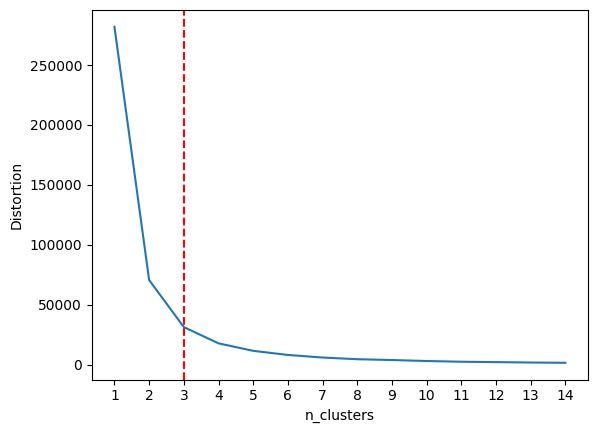

In [ ]:
#instantiate KMeans
metric_list=[]
label_n =[]
cent_list = []
for i in range(1,15):
    km = KMeans(i,n_init='auto')
    km.fit(pca_dataset)
    metric_list.append(km.inertia_)
    label_n.append(km.labels_)
    cent_list.append(km.cluster_centers_)
plt.plot(range(1,15),metric_list)
plt.xticks(np.arange(1,15))
plt.xlabel('n_clusters')    
plt.ylabel('Distortion')
plt.axvline(x=3,linestyle='--',c='red')
plt.show()

### Using Elbow method and Principle Component Analysis we have got our Optimial clusters i.e 3 clusters

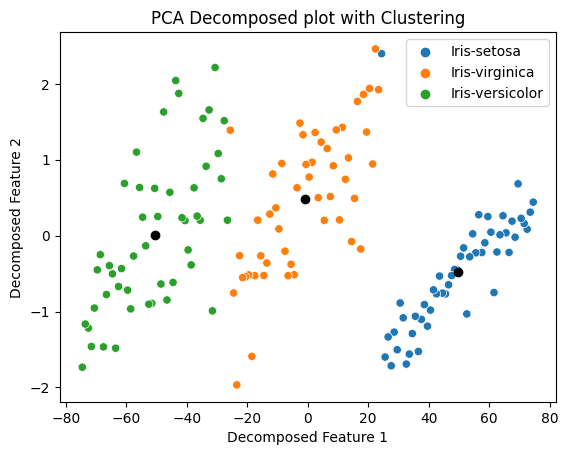

In [ ]:
categories = ['Iris-virginica','Iris-setosa','Iris-versicolor']
labels=[]
 
for p,j in enumerate(label_n[2]):
         labels.append(categories[j])
plt.title('PCA Decomposed plot with Clustering')
sns.scatterplot(x= pca_dataset[:,0],y=pca_dataset[:,1],hue=labels)
plt.scatter(cent_list[2][:,0],cent_list[2][:,1],c='black')
plt.xlabel('Decomposed Feature 1')
plt.ylabel('Decomposed Feature 2')
plt.show()